Se analizaran los datos de Grupo Financiero Inbursa, desde el 7-02-2001 hasta 4-02-2021

In [1]:
import torch, pywt, csv, numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import reader1 as rd
import utilerias as utls
#import pyrenn as renn
from NARNN import NARNN 


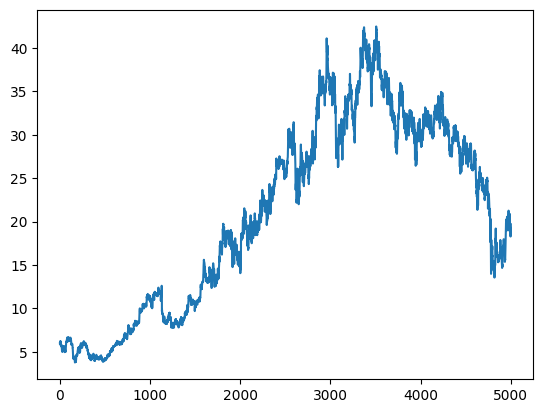

In [2]:

# Abrir el archivo CSV en modo lectura
#DATOS = 'C_Egipto_diario.csv'
DATOS = 'cierre.csv'
#Grupo Financiero Inbursa
cierre_inbursa = rd.leer_archivo('cierre.csv')
cierre = rd.leer_archivo(DATOS)
#se convierten todos los valores a flotantes
cierre = cierre.astype(float)
x = np.arange(1, (cierre.shape[0]+1))

# Crear un gráfico de línea con los valores de x, y
plt.plot(x, cierre)

# Mostrar el gráfico
plt.show()

#Eleccion de Mother Wavelet

Se elige las mother wavelets dependiendo de las caracteristicas de la serie de tiempo que se va a analizar. Para series que impliquen cambios no periodicos y repentinos es recomendable usar Haar ya que responde bien a estos cambios repentinos.

Se elige bior3.5 debido a las caracteristicas de las fluctuaciones entre periodos con altas cantidades de inversiones y periodos en los que no.

En general, el mother wavelet debe de ser una funcion de las caracteristicas de la serie original para que esta pueda ser reconstruida o analizada 

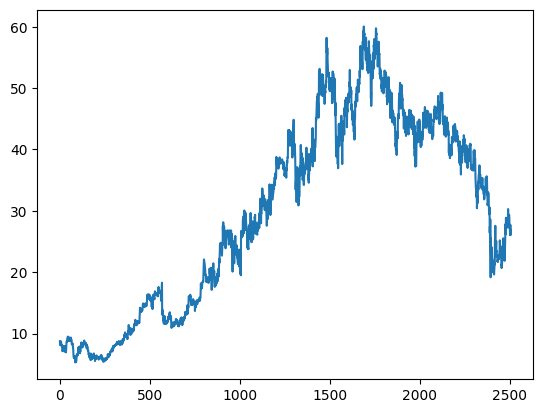

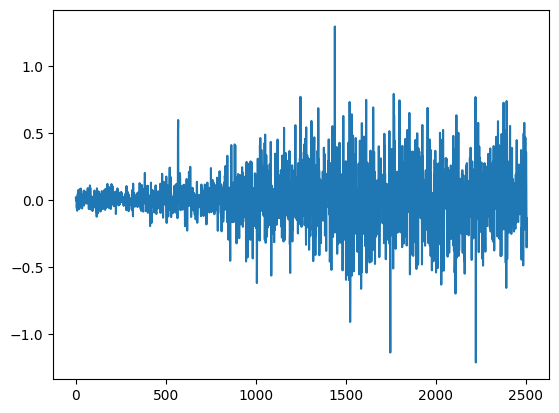

In [3]:
#Se descompone la lista de precios de cierre del intervalo mencionado anteriormente a partir de la dwt con la función bior3.5
(cA, cD) = pywt.dwt(cierre.tolist(), 'bior3.5')

# cA.size = 2505, cD.size = 2505
plt.plot(x[:len(cA)], cA[:len(cA)])
plt.show()

plt.plot(x[:len(cD)], cD[:len(cD)])
plt.show()

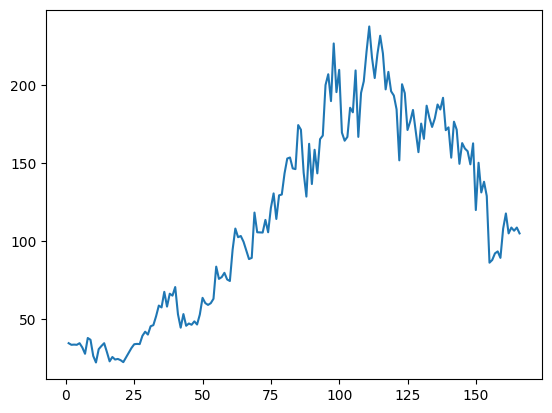

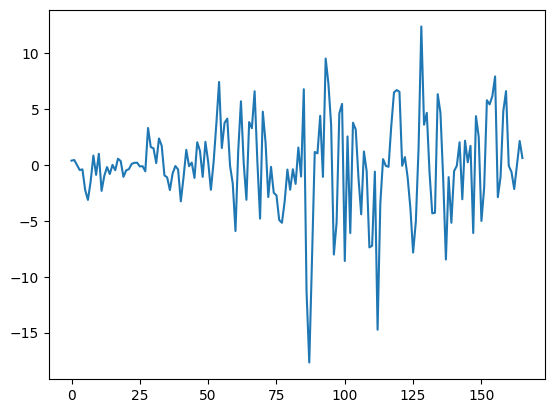

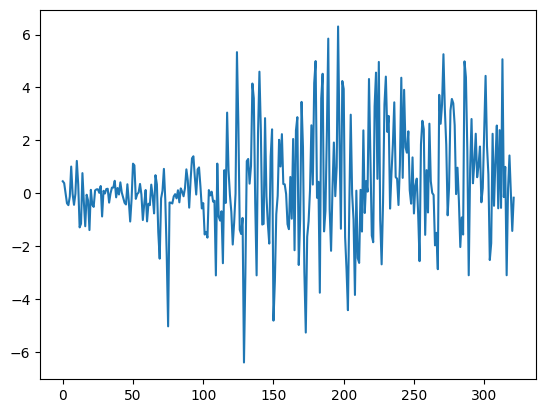

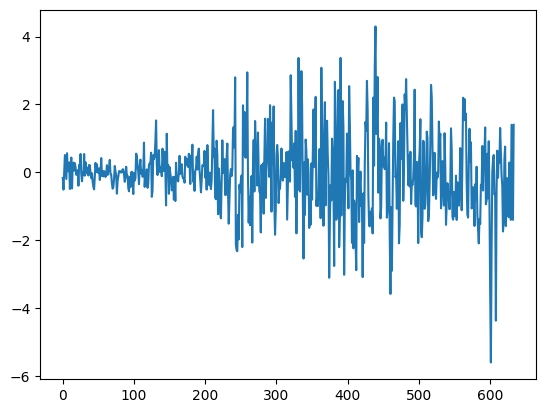

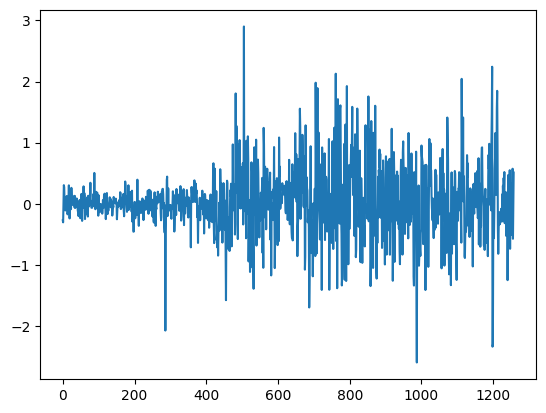

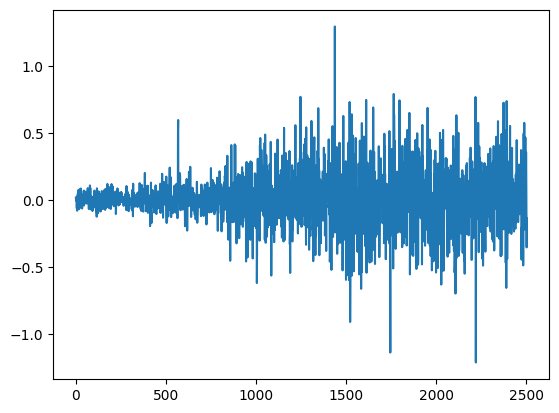

In [4]:
#Se realiza el proceso 5 veces
coeffs = pywt.wavedec(cierre, 'bior3.5', level=5)

cA = coeffs[0]
plt.plot(x[:len(cA)], cA)
plt.show()

cD_1 = coeffs[1]
cD_2 = coeffs[2]
cD_3 = coeffs[3]
cD_4 = coeffs[4]
cD_5 = coeffs[5]
plt.plot(range(len(cD_1)), cD_1)
plt.show()

plt.plot(range(len(cD_2)), cD_2)
plt.show()

plt.plot(range(len(cD_3)), cD_3)
plt.show()

plt.plot(range(len(cD_4)), cD_4)
plt.show()

plt.plot(range(len(cD_5)), cD_5)
plt.show()


In [5]:
A5=coeffs[0]#coeficientes de analisis
D1=coeffs[1]#coeficientes de detalle
D2=coeffs[2]
D3=coeffs[3]
D4=coeffs[4]
D5=coeffs[5]

#Se normalizan cada uno de los elementos de los vectores contenidos en las descomposicion de la serie de tiempo original
coeffs_n = [utls.normalizar(vect) for vect in coeffs]

#Estos 6 arreglos representan la descomposición de la señal original. Se tendrán que armar 6 redes que predigan cada una de estas
#componentes, Las entradas correspondientes a cada una son las 8 semanas anteriores para calcular la novena


entrenamiento,prueba,validacion = utls.generar_conjuntos(coeffs_n,False,5)
#la de abajo es una prueba
#entrenamiento,prueba,validacion = utls.generar_conjuntos([[1,2,3,4,5,6,7,8,9,10],[1,2,3,4,5,6,7,8,9,10]],False,1)

In [6]:
red_A1 = NARNN(input_dim=8, hidden_dim=0, output_dim=1, num_layers=0)
red_D1 = NARNN(input_dim=8, hidden_dim=0, output_dim=1, num_layers=0)
red_D2 = NARNN(input_dim=8, hidden_dim=0, output_dim=1, num_layers=0)
red_D3 = NARNN(input_dim=8, hidden_dim=0, output_dim=1, num_layers=0)
red_D4 = NARNN(input_dim=8, hidden_dim=0, output_dim=1, num_layers=0)
red_D5 = NARNN(input_dim=8, hidden_dim=0, output_dim=1, num_layers=0)


#entradas ya procesadas
entradas_8_1 = [[],[],[],[],[],[]]

# A cada uno de los conjuntos de entrenamiento se les da una forma de entrada en especifico,
# que es un arreglo de 8 y uno de un solo elemento para representar la salida
for e in range(6):
    entradas_8_1[e] = utls.corrimiento_t_1(entrenamiento[e],9)
    
#la forma de la entrada de la red neuronal
print(entradas_8_1[0])
print(len(entradas_8_1[0]))
#salida = red(entradas_8_1[0][:, :8])
#print(salida)


[tensor([[0.0574, 0.0526, 0.0532, 0.0526, 0.0574, 0.0446, 0.0259, 0.0728, 0.0675]]), tensor([[0.0526, 0.0532, 0.0526, 0.0574, 0.0446, 0.0259, 0.0728, 0.0675, 0.0194]]), tensor([[0.0532, 0.0526, 0.0574, 0.0446, 0.0259, 0.0728, 0.0675, 0.0194, 0.0000]]), tensor([[0.0526, 0.0574, 0.0446, 0.0259, 0.0728, 0.0675, 0.0194, 0.0000, 0.0397]]), tensor([[0.0574, 0.0446, 0.0259, 0.0728, 0.0675, 0.0194, 0.0000, 0.0397, 0.0491]]), tensor([[0.0446, 0.0259, 0.0728, 0.0675, 0.0194, 0.0000, 0.0397, 0.0491, 0.0573]]), tensor([[0.0259, 0.0728, 0.0675, 0.0194, 0.0000, 0.0397, 0.0491, 0.0573, 0.0311]]), tensor([[0.0728, 0.0675, 0.0194, 0.0000, 0.0397, 0.0491, 0.0573, 0.0311, 0.0034]]), tensor([[0.0675, 0.0194, 0.0000, 0.0397, 0.0491, 0.0573, 0.0311, 0.0034, 0.0163]]), tensor([[0.0194, 0.0000, 0.0397, 0.0491, 0.0573, 0.0311, 0.0034, 0.0163, 0.0088]]), tensor([[0.0000, 0.0397, 0.0491, 0.0573, 0.0311, 0.0034, 0.0163, 0.0088, 0.0105]]), tensor([[0.0397, 0.0491, 0.0573, 0.0311, 0.0034, 0.0163, 0.0088, 0.0105, 0.

In [7]:


#cada entrenamiento tarda aproximadamente 5 min con 1000 epocas
#params = red_A1.parameters()
#--utls.entrena(red_A1,0,entradas_8_1,50)
utls.entrena_LM(red_A1,0,entradas_8_1,3)
#utls.entrena(entradas_8_1,red_D1,1)
#utls.entrena(entradas_8_1,red_D2,2)
#utls.entrena(entradas_8_1,red_D3,3)
#utls.entrena(entradas_8_1,red_D4,4)
#utls.entrena(entradas_8_1,red_D5,5)

paramtros antes: Parameter containing:
tensor([[-0.0206,  0.3105, -0.0318, -0.3482,  0.3153,  0.2253,  0.1408,  0.1570],
        [ 0.0544, -0.2128,  0.0352, -0.1999, -0.3310, -0.3454,  0.2236,  0.1143],
        [-0.3492, -0.0768,  0.3316,  0.0298, -0.0707,  0.1880, -0.0308,  0.2171],
        [ 0.0386, -0.0481,  0.2323,  0.1023, -0.1527,  0.1560,  0.1296,  0.1421],
        [ 0.2956,  0.2973,  0.0287, -0.2156, -0.1563,  0.1490, -0.3269, -0.2213],
        [ 0.2060,  0.0277,  0.3449,  0.3357, -0.1494, -0.1257,  0.2556,  0.2559],
        [ 0.1432,  0.2792, -0.0122, -0.2805, -0.0855, -0.3031,  0.3303,  0.0306],
        [ 0.2055,  0.2232,  0.0777, -0.2317,  0.1719,  0.0017, -0.0261, -0.0264],
        [ 0.1826,  0.3337,  0.0739, -0.0774,  0.1753, -0.0548,  0.2685, -0.1905],
        [ 0.1971,  0.1686,  0.1509, -0.1043, -0.2394, -0.0885, -0.1530,  0.2257]],
       requires_grad=True)
INICIO DE EPOCA...
>>Ventana Actual: 1
 >> Entrada: tensor([[0.0574, 0.0526, 0.0532, 0.0526, 0.0574, 0.0446, 0.02

KeyboardInterrupt: 

In [ ]:
#print("paramtros despues: " + str([i for i in red_A1.parameters()][0]))
#print(red_A1(torch.Tensor([0.8709, 0.6840, 0.6600, 0.6713, 0.7581, 0.7445, 0.8692, 0.6714])))

In [ ]:


pruebas_ordenadas = []

for c_pruebas in entrenamiento:#prueba
    pruebas_ordenadas.append(utls.forma_entrada(c_pruebas,9))#prueba[0] es el conjunto de prueba para cada red
#pruebas = forma_entrada(prueba[0],9)#prueba[0] es el conjunto de prueba para A1

print(utls.genera_prediccion(pruebas_ordenadas[0],red_A1).detach().numpy().tolist()[0])
#print(entrenamiento[0])


In [ ]:
plt.plot(range(108), entrenamiento[0][:-8])
plt.plot(range(108), utls.genera_prediccion(pruebas_ordenadas[0],red_A1).detach().numpy().tolist()[0])
plt.show()

plt.plot(range(108), entrenamiento[0][:-8])
plt.plot(range(108), [utls.desnormalizar(vect) for vect in utls.genera_prediccion(pruebas_ordenadas[0],red_A1).detach().numpy().tolist()[0]])
# Mostrar el gráfico
plt.show()
#investigar bien la dwt y predecir la red con los corrimientos de 1, usando los datos que predice o solo los datos que le doy
#Lo que hace es generar una prediccion cada noveno día, con los datos que ya se le dan del entrenamiento, es preciso ajustar los parametros hasta que ambas series
#sean iguales
print(prueba[0])

In [ ]:
salida = utls.genera_salida(entrenamiento[0],8,red_A1)
plt.plot(range(116), entrenamiento[0])
plt.plot(range(116), salida)
plt.show()
